# Praktikum IF3270 2023/2024

Tujuan praktikum IF3270 Pembelajaran Mesin:
1.   Peserta memahami rangkaian proses analitik data menggunakan pendekatan pembelajaran mesin. 
2.   Peserta memahami bahwa proses pengembangan model pembelajaran mesin juga ditentukan dari kualitas data, penanganan data, dan penentuan algoritma serta hyperparameter-nya; tidak cukup hanya dengan memastikan implementasi algoritma berjalan tanpa kesalahan.
3.   Peserta mampu menginterpretasikan hasil dari evaluasi model dalam proses analitik menggunakan pendekatan pembelajaran mesin.

Praktikum dilaksanakan secara berkelompok. Setiap kelompok terdiri atas 2 mahasiswa. Perhatikan bahwa terdapat berkas yang harus dikumpulkan saat keberjalanan praktikum untuk bagian A (25 April 2024, pukul 12.00 WIB) dan berkas yang dikumpulkan setelah waktu praktikum selesai untuk bagian B (25 April 2024, pukul 21.00 WIB).

Disediakan data yang sudah dibagi menjadi data latih (`df_train`), data validasi (`df_val`), dan data uji (`df_test`).

**Bagian 1**: (batas waktu: 25 April 2024, 12.00 WIB)

1. Buatlah _baseline_ dengan menggunakan model _logistic regression_.
2. Lakukan analisis data terkait hal berikut:
    - _duplicate value_,
    - _missing value_,
    - _outlier_,
    - _balance of data_.
3. Jelaskan rencana penanganan yang ada pada poin 2.
4. Jelaskan teknik _encoding_ yang digunakan terhadap data yang disediakan apabila dilakukan, disertai dengan alasan.
5. Buatlah desain eksperimen dengan menentukan hal berikut:
    - tujuan eksperimen,
    - variabel dependen dan independen,
    - strategi eksperimen,
    - skema validasi.
    
**Bagian 2**: (batas waktu: 25 April 2024, 21.00 WIB)

6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5.
7. Berdasarkan hasil prediksi yang dihasilkan, buatlah kesimpulan analisis **hasil diabetes**.

---
Catatan:
- Jika terdapat perubahan jawaban pada poin 1—5 (contoh: perbedaan penanganan _outlier_), jelaskan pada laporan mengenai jawaban sebelum, jawaban sesudah, dan alasan pengubahan jawaban.
- Eksperimen dapat berupa penggantian model klasifikasi, pengaturan hyperparameter, model stacking, grid search, oversampling, undersampling, dan lain sebagainya. Semakin variatif eksperimen yang dilakukan, semakin baik.

## Dataset
`diabetes.csv` merupakan dataset yang telah dimodifikasi dari [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/) sebagai kumpulan indikator individu yang diperoleh dari survei untuk kasus diabetes. Dataset ini berguna untuk melakukan prediksi diabetes sehingga suatu individu dapat diketahui memiliki risiko tinggi diabetes atau tidak. Hal ini diperoleh dari fitur-fitur yang dapat dianalisis lebih lanjut sebelum mencapai kesimpulan.

Berikut adalah deskripsi singkat setiap kolom:

1. **HighBP**: Memiliki tekanan darah tinggi (BP: Blood Pressure) atau tidak
2. **HighChol**: Kolesterol tinggi atau tidak
3. **BMI**: Besaran Body Mass Index
4. **Smoker**: Perokok atau bukan perokok
5. **Stroke**: Pernah mengalami struk atau tidak
6. **HeartDiseaseorAttack**: Memiliki riwayat penyakit antara jantung koroner dan serangan jantung atau tidak sama sekali
7. **PhysActivity**: Aktif secara fisik dalam 30 hari terakhir atau tidak
8. **Fruits**: Mengonsumsi buah setiap hari atau tidak 
9. **Veggies**: Mengonsumsi sayur setiap hari atau tidak
10. **HvyAlcoholConsump**: Peminum berat alkohol atau bukan 
11. **AnyHealthcare**: Memiliki perlindungan kesehatan atau tidak, contohnya memiliki asuransi kesehatan
12. **GenHtlth**: Evaluasi mandiri terhadap kesehatan, skala 1-5 (1: Sangat baik, 2: Cukup Baik, 3: Baik, 4: Biasa saja, 5: Buruk)
13. **MentHlth**: Jumlah hari keadaan mental buruk dalam 30 hari terakhir (skala 0-30 hari)  
14. **PhysHlth**: Jumlah hari keadaan fisik buruk dalam 30 hari terakhir (skala 0-30 hari)
15. **DiffWalk**: Memiliki kesulitan berjalan atau menaiki tangga
16. **Sex**: (M) Male atau (F) Female
17. **Age**: 13 kategori umur (1: 18-24 tahun, 9: 60-64 tahun, 13: 80 tahun ke atas)
18. **Education**: Level edukasi skala 1-6 (1: Tidak pernah sekolah atau hanya TK, 2: SD, dst)
19. **Income**: Skala pendapatan 1-8
20. **Diabetes**: Apakah mengalami diabetes atau tidak (Kolom target)

In [50]:
# Import library di sini
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


# Persiapan Data

In [51]:
data = pd.read_csv("diabetes.csv")
data.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,F,9.0,6.0,8.0,False
1,0.0,0.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,M,13.0,6.0,8.0,False
2,1.0,0.0,29.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,20.0,5.0,0.0,F,12.0,6.0,8.0,False
3,0.0,0.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,30.0,0.0,0.0,M,1.0,5.0,7.0,False
4,0.0,0.0,33.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,30.0,15.0,1.0,F,11.0,4.0,3.0,False


In [52]:
data.dtypes

HighBP                  float64
HighChol                float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                      object
Age                     float64
Education               float64
Income                  float64
Diabetes                   bool
dtype: object

## Encoding
Pada data di atas, terdapat kolom yang bertipe data "object", yaitu kolom "Sex". Untuk dimodelkan, kolom ini perlu di-encode. Berdasarkan deskripsi di atas, kolom ini bertipe kategorikal, dengan dua nilai yang mungkin, yaitu "M" (Male) dan "F" (Female). Oleh karena itu, kita akan meng-encode nilai "M" menjadi 0 dan "F" menjadi 1.

In [53]:
encoding = {"Sex": {"M": 0, "F": 1}}
data = data.replace(encoding)
data.head()

/tmp/ipykernel_26004/2128561445.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(encoding)


,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1,9.0,6.0,8.0,False
1,0.0,0.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0,13.0,6.0,8.0,False
2,1.0,0.0,29.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,20.0,5.0,0.0,1,12.0,6.0,8.0,False
3,0.0,0.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,30.0,0.0,0.0,0,1.0,5.0,7.0,False
4,0.0,0.0,33.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,30.0,15.0,1.0,1,11.0,4.0,3.0,False


In [54]:
data.dtypes

HighBP                  float64
HighChol                float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                       int64
Age                     float64
Education               float64
Income                  float64
Diabetes                   bool
dtype: object

# Pemisahan Data

In [93]:
X = data.drop(columns="Diabetes")
y = data["Diabetes"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Gunakan data validasi untuk bereksperimen dengan model
# Gunakan data test untuk mengevaluasi model hanya di akhir eksperimen
df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

_Deliverable_ yang akan dihasilkan adalah sebagai berikut:
1. berkas _notebook_ dengan format nama `PraktikumIF3270_M1_NIM1_NIM2.ipynb` untuk Bagian 1;
2. berkas _notebook_ dengan format nama `PraktikumIF3270_M2_NIM1_NIM2.ipynb` untuk Bagian 1 + Bagian 2; serta
3. berkas laporan dengan format nama `PraktikumIF3270_NIM1_NIM2.pdf` yang mencakup hal berikut:
    - hasil analisis data,
    - penanganan dari hasil analisis data,
    - justifikasi teknik-teknik yang dipilih,
    - perubahan yang dilakukan pada jawaban poin 1—5 jika ada,
    - desain eksperimen,
    - hasil eksperimen,
    - analisis dari hasil eksperimen,
    - kesimpulan,
    - pembagian tugas/kerja per anggota kelompok

Batas waktu pengumpulan:
- _Deliverable_ poin 1: Senin, 25 April 2023, pukul 12.00 WIB
- _Deliverable_ poin 2: Senin, 25 April 2023, pukul 21.00 WIB
- _Deliverable_ poin 3: Senin, 25 April 2023, pukul 21.00 WIB

# Jawaban

## 1. Baseline Model

### Model

In [56]:
baseline_model = LogisticRegression(solver="liblinear", random_state=42, max_iter=1000)
baseline_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

### Metrics

#### Terhadap Data Validasi

In [57]:
y_predict = baseline_model.predict(X_val)

print(">>> CLASSIFICATION REPORT")
print(classification_report(y_val, y_predict))
print(">>> CONFUSION MATRIX")
print(confusion_matrix(y_val, y_predict))

>>> CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.88      0.98      0.93      7027
        True       0.55      0.15      0.23      1091

    accuracy                           0.87      8118
   macro avg       0.71      0.56      0.58      8118
weighted avg       0.84      0.87      0.83      8118

>>> CONFUSION MATRIX
[[6895  132]
 [ 931  160]]


#### Terhadap Data Test

In [58]:
y_predict = baseline_model.predict(X_test)

print(">>> CLASSIFICATION REPORT")
print(classification_report(y_test, y_predict))
print(">>> CONFUSION MATRIX")
print(confusion_matrix(y_test, y_predict))

>>> CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.88      0.98      0.93      8732
        True       0.55      0.14      0.22      1416

    accuracy                           0.86     10148
   macro avg       0.71      0.56      0.57     10148
weighted avg       0.83      0.86      0.83     10148

>>> CONFUSION MATRIX
[[8569  163]
 [1217  199]]


## 2. Analisis Data

Analisis data dilakukan untuk mendapat insight dari data terkait. Analisis dilakukan terhadap empat aspek pada data, yaitu duplicate value, missing value, outlier, dan balance of data.

### Duplicate Value

Analisis duplicate value dilakukan untuk menemukan nilai duplikat pada data. Data duplikat sendiri tidak memberikan insight ataupun benefit tambahan untuk dataset dan terkadang memiliki pengaruh negatif terhadap model yang dibuat.

Dari analisis, **ditemukan terdapat 1 duplicate value pada train set, 1 duplicate value pada validation set, dan 1 duplicate value pada test set.**

In [59]:
print("Duplicate values (train set):", df_train.duplicated().sum())
print("Duplicate values (validation set):", df_val.duplicated().sum())
print("Duplicate values (test set):", df_test.duplicated().sum())

Duplicate values (train set): 1135
Duplicate values (validation set): 98
Duplicate values (test set): 155


### Missing Value

Analisis missing value dilakukan untuk menemukan jumlah data yang hilang untuk setiap fitur pada dataset. Missing value pada dataset membutuhkan penanganan khusus karena tidak semua model memiliki teknik bawaan untuk menerima missing value pada data.

Dari analisis, **ditemukan tidak ada missing value pada train set, validation set, dan test set.**

In [60]:
print("Missing values (train set):\n", df_train.isnull().sum(), sep="")

Missing values (train set):
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes                0
dtype: int64


In [61]:
print("Missing values (validation set):\n", df_train.isnull().sum(), sep="")

Missing values (validation set):
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes                0
dtype: int64


In [62]:
print("Missing values (test set):\n", df_train.isnull().sum(), sep="")

Missing values (test set):
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes                0
dtype: int64


### Outlier

Analisis outlier dilakukan untuk menemukan data yang bernilai berbeda dari data-data lainnya. Outlier dapat menandakan sebuah anomali pada data. Data outlier dapat dianalisis lebih lanjut untuk menentukan apakah sebaiknya dihilangkan dari dataset atau tidak. 

Metode analisis outlier yang digunakan adalah metode IQR dimana ditentukan sebuah batas bawah (`Q1 - 1.5 * iqr`) dan batas atas (`Q3 + 1.5 * iqr`). Data dalam interval tersebut dikategorikan sebagai data normal, sementara data di luar interval tersebut dikategorikan sebagai outlier. Box-plot digunakan untuk memvisualisasikan outlier pada data dengan menampilkan lokasi batas atas dan batas bawah, serta lokasi data yang merupakan outlier.

Dari analisis, **ditemukan empat kolom yang memiliki outlier, yaitu `BMI`, `GenHlth`, `MentHlth`, dan `PhysHlth`.**

In [63]:
def check_outlier(df, title):
  print(f"{title} Outliers")
  for col in df.columns:
    if df[col].dtype == "float64" and len(df[col].value_counts()) > 2:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      iqr = Q3 - Q1
      lower_bound = Q1 - 1.5 * iqr
      upper_bound = Q3 + 1.5 * iqr
      print("Outlier pada kolom", col, ":", len(df[(df[col] < lower_bound) | (df[col] > upper_bound)]), "data")
      
  fig, axes = plt.subplots(2, 4, figsize=(16, 10))

  count = 0
  for col in df.columns:
    if df[col].dtype == "float64" and len(df[col].value_counts()) > 2:
      sns.boxplot(df[col], ax=axes[count//4, count%4])
      count += 1
      
  plt.tight_layout()

Train-set Outliers
Outlier pada kolom BMI : 1273 data
Outlier pada kolom GenHlth : 1493 data
Outlier pada kolom MentHlth : 4718 data
Outlier pada kolom PhysHlth : 5205 data
Outlier pada kolom Age : 0 data
Outlier pada kolom Education : 0 data
Outlier pada kolom Income : 0 data


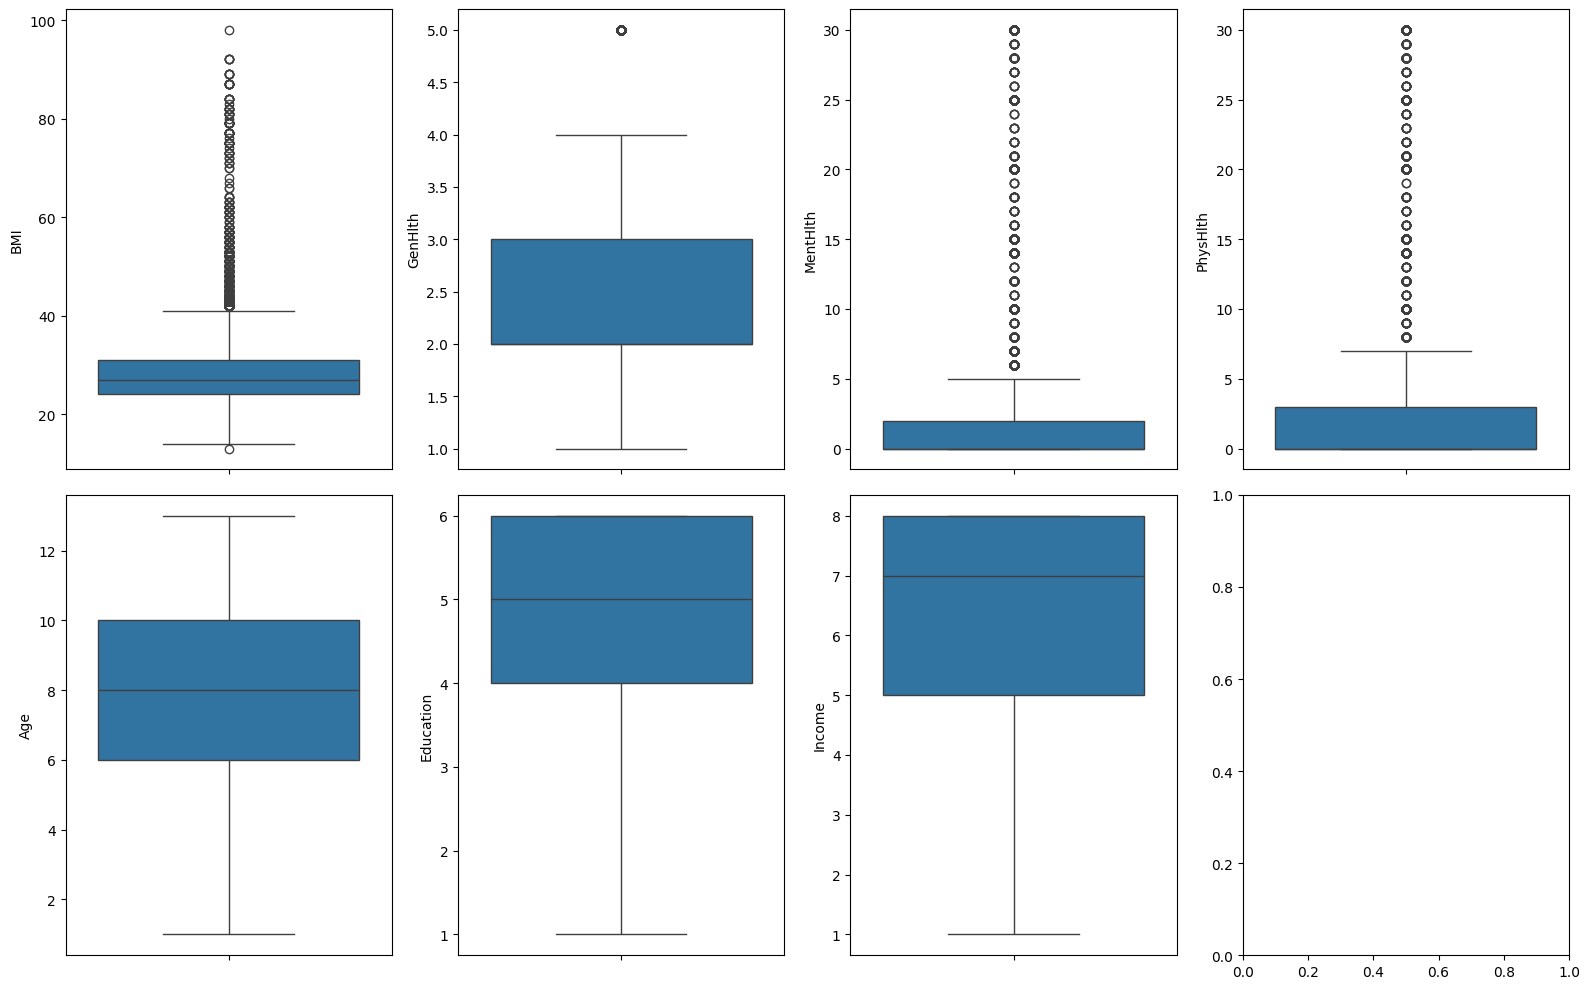

In [64]:
check_outlier(df_train, "Train-set")

Validation-set Outliers
Outlier pada kolom BMI : 323 data
Outlier pada kolom GenHlth : 378 data
Outlier pada kolom MentHlth : 1150 data
Outlier pada kolom PhysHlth : 1296 data
Outlier pada kolom Age : 0 data
Outlier pada kolom Education : 0 data
Outlier pada kolom Income : 0 data


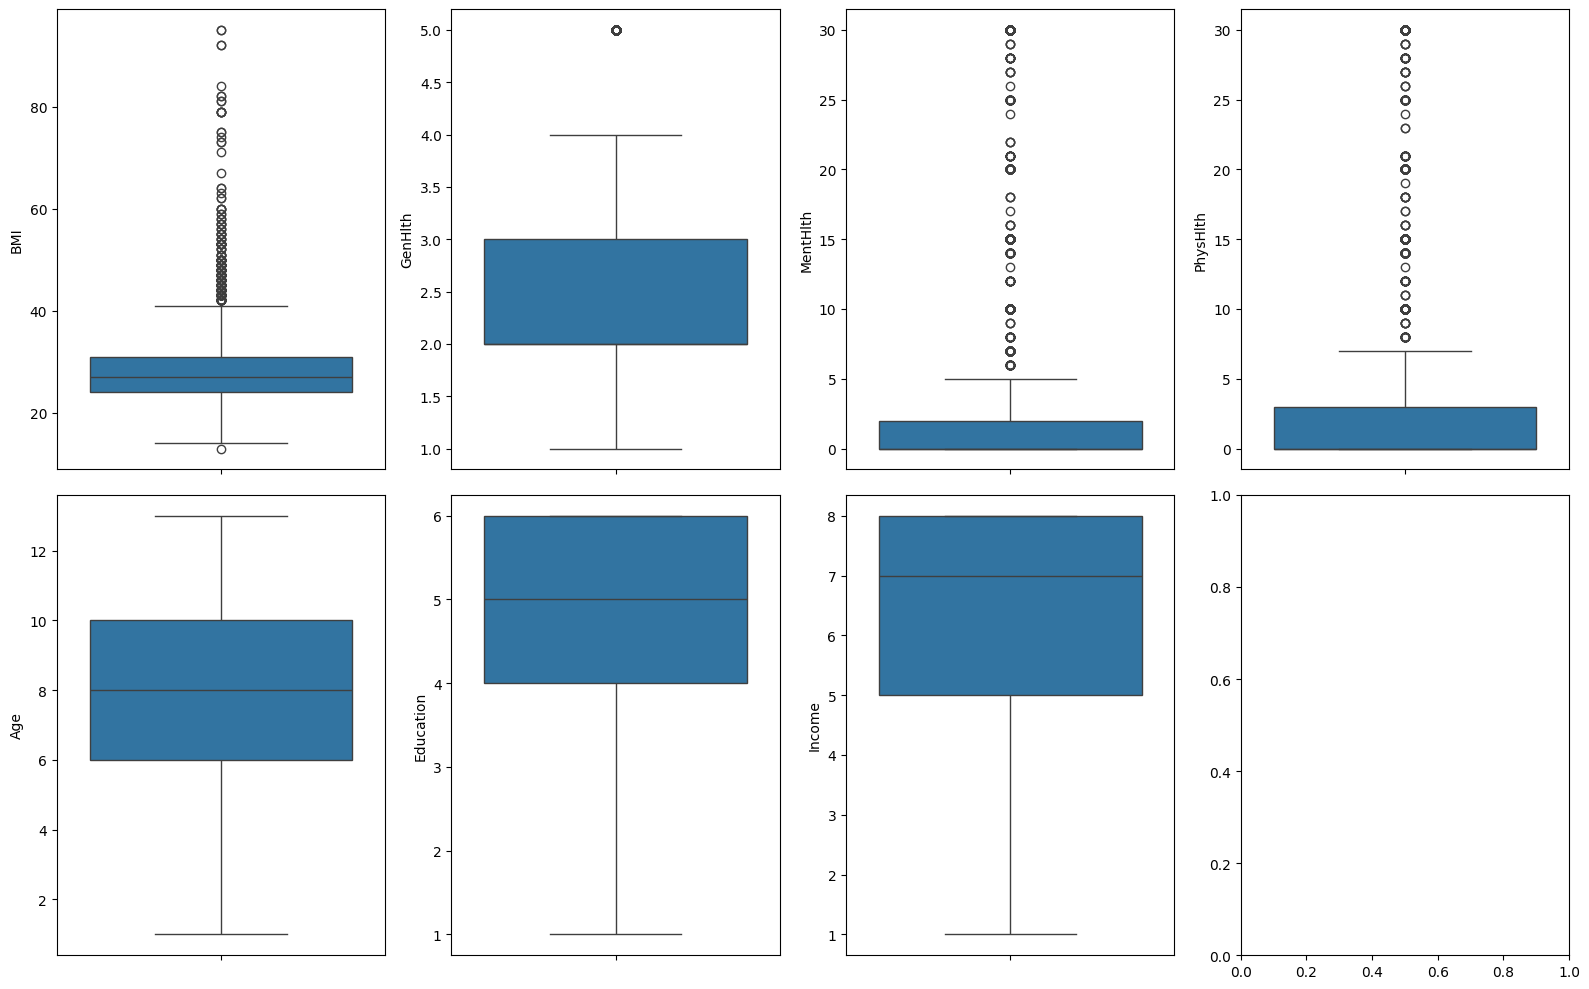

In [65]:
check_outlier(df_val, "Validation-set")

Test-set Outliers
Outlier pada kolom BMI : 383 data
Outlier pada kolom GenHlth : 494 data
Outlier pada kolom MentHlth : 1440 data
Outlier pada kolom PhysHlth : 1697 data
Outlier pada kolom Age : 0 data
Outlier pada kolom Education : 0 data
Outlier pada kolom Income : 0 data


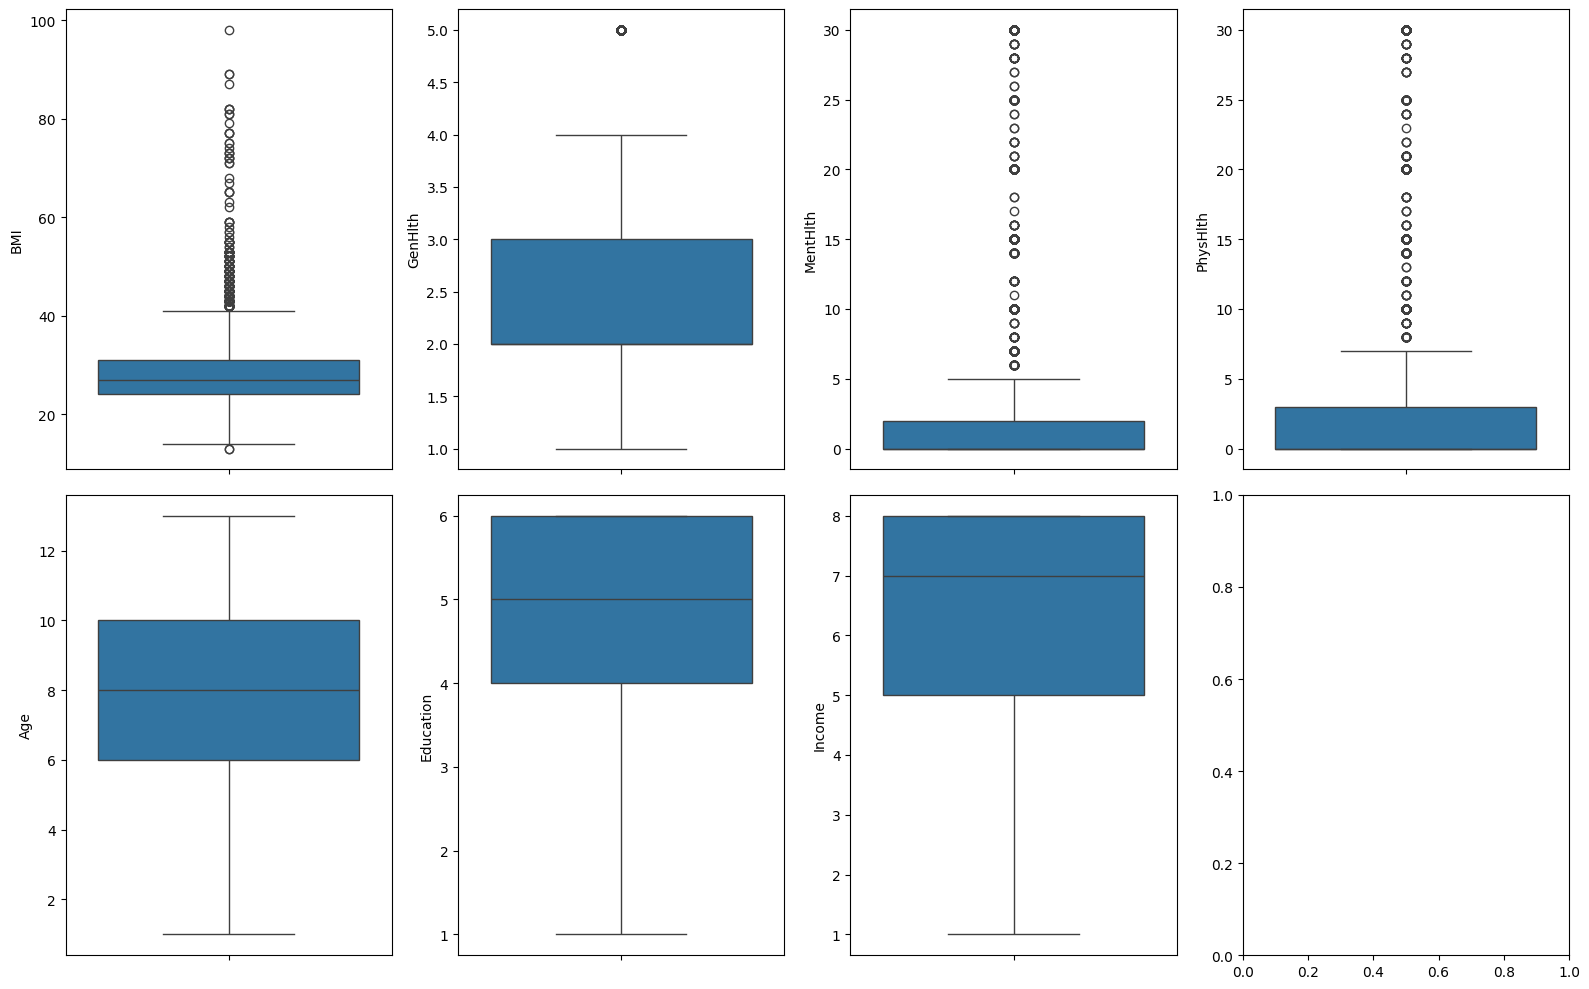

In [66]:
check_outlier(df_test, "Test-set")

### Balance of Data

Analisis balance of data dilakukan untuk menentukan distribusi dari kelas target. Target yang imbalanced akan membutuhkan penanganan khusus pada dataset agar model yang di-train tidak bias ke salah satu kelas dengan distribusi yang lebih tinggi.

Dari analisis, **dataset bersifat imbalanced dengan target=False sebagai kelas mayoritas.**

In [67]:
def check_balance_of_data(df, title):
  print(f"{title} Distribution")
  print(df["Diabetes"].value_counts())
  
  sns.histplot(df["Diabetes"], discrete=True)

Train-set Distribution
Diabetes
False    28031
True      4439
Name: count, dtype: int64


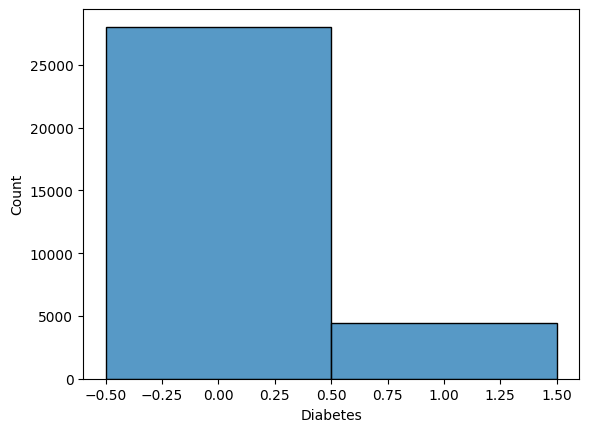

In [68]:
check_balance_of_data(df_train, "Train-set")

Validation-set Distribution
Diabetes
False    7027
True     1091
Name: count, dtype: int64


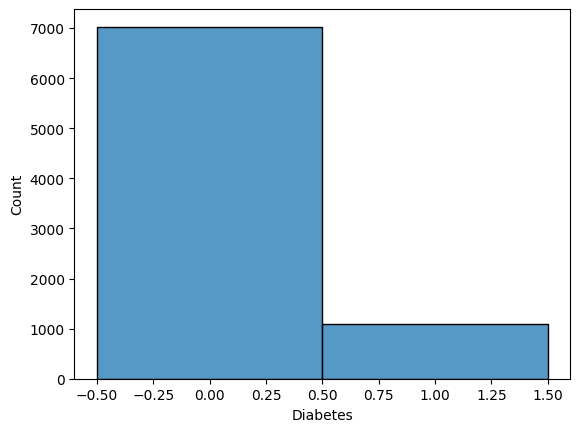

In [69]:
check_balance_of_data(df_val, "Validation-set")

Test-set Distribution
Diabetes
False    8732
True     1416
Name: count, dtype: int64


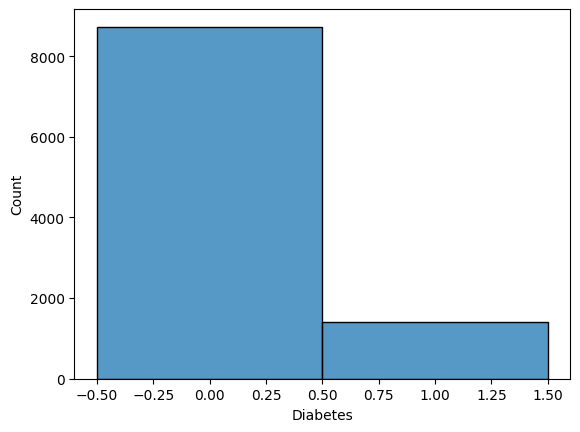

In [70]:
check_balance_of_data(df_test, "Test-set")

## 3. Penanganan Data

Berdasarkan analisis, ditemukan beberapa teknik yang dapat dilakukan untuk menangani isu-isu pada dataset. Teknik-teknik ini digunakan untuk menghasilkan model yang lebih robust dan akurat. Berikut merupakan teknik penanganan data yang dapat digunakan.

- **Duplicate Value**:  
Duplicate value dapat ditangani dengan menghapus data yang duplikat. Hal ini bertujuan untuk menghasilkan proses training model yang lebih efisien.

- **Missing Value**:  
Missing value dapat ditangani dengan melakukan imputasi pada dataset. Proses imputasi untuk fitur numerik dapat menggunakan nilai median atau mean, sementara untuk fitur kategorikal dapat menggunakan nilai modus. Selain imputasi, missing value dapat ditangani dengan menghapus sebuah kolom apabila persentase missing value untuk kolom tersebut terlalu besar.

- **Outlier**:  
Outlier dapat ditangani dengan menghilangkan nilai outlier dari dataset. Penanganan ini bersifat tentatif karena terkadang outlier masih memberikan performa yang baik pada model. Akan tetapi, apabila outlier berasal dari observasi yang salah, data harus di-drop karena model yang dihasilkan akan bias ke training data dan tidak representatif pada data aslinya.

- **Balance of Data**:  
Imbalanced data dapat ditangani dengan melakukan undersampling atau oversampling pada dataset. Hal ini memastikan semua kelas pada target direpresentasikan secara rata dan model tidak bias ke salah satu kelas saja.

## 4. Encoding

Pada data di atas, terdapat kolom yang bertipe data "object", yaitu kolom "Sex". Untuk dimodelkan, kolom ini perlu di-encode. Berdasarkan deskripsi di atas, kolom ini bertipe kategorikal, dengan dua nilai yang mungkin, yaitu "M" (Male) dan "F" (Female). Oleh karena itu, dilakukan label encoding dengan meng-encode nilai "M" menjadi 0 dan "F" menjadi 1. 

## 5. Desain Eksperimen

### Tujuan Eksperimen

Membuat model classifier yang dapat memprediksi (mengklasifikasikan) apakah seseorang mengidap diabetes atau tidak berdasarkan data-data:
1. Kepemilikan tekanan darah tinggi
2. Kepemilikan kolestrol tinggi
3. Body Mass Index (BMI)
4. Status perokok
5. Riwayat struk
6. Riwayat penyakit jantung koroner dan serangan jantung
7. Keaktifan fisik dalam 30 hari terakhir
8. Konsumsi buah setiap hari
9. Konsumsi sayur setiap hari
10. Konsumsi alkohol berat
11. Kepemilikan perlindungan kesehatan
12. Evaluasi mandiri terhadap kesehatan
13. Jumlah hari keadaan mental buruk dalam 30 hari terakhir
14. Jumlah hari keadaan fisik buruk dalam 30 hari terakhir
15. Kesulitan berjalan
16. Jenis kelamin
17. Usia
18. Tingkat edukasi
19. Pendapatan

### Variabel

#### Variabel Dependen

**Diabetes**, yang menandakan apakah seseorang mengidap diabetes atau tidak.

#### Variabel Independen

1. **HighBP**: Memiliki tekanan darah tinggi (BP: Blood Pressure) atau tidak
2. **HighChol**: Kolesterol tinggi atau tidak
3. **BMI**: Besaran Body Mass Index
4. **Smoker**: Perokok atau bukan perokok
5. **Stroke**: Pernah mengalami struk atau tidak
6. **HeartDiseaseorAttack**: Memiliki riwayat penyakit antara jantung koroner dan serangan jantung atau tidak sama sekali
7. **PhysActivity**: Aktif secara fisik dalam 30 hari terakhir atau tidak
8. **Fruits**: Mengonsumsi buah setiap hari atau tidak 
9. **Veggies**: Mengonsumsi sayur setiap hari atau tidak
10. **HvyAlcoholConsump**: Peminum berat alkohol atau bukan 
11. **AnyHealthcare**: Memiliki perlindungan kesehatan atau tidak, contohnya memiliki asuransi kesehatan
12. **GenHtlth**: Evaluasi mandiri terhadap kesehatan, skala 1-5 (1: Sangat baik, 2: Cukup Baik, 3: Baik, 4: Biasa saja, 5: Buruk)
13. **MentHlth**: Jumlah hari keadaan mental buruk dalam 30 hari terakhir (skala 0-30 hari)  
14. **PhysHlth**: Jumlah hari keadaan fisik buruk dalam 30 hari terakhir (skala 0-30 hari)
15. **DiffWalk**: Memiliki kesulitan berjalan atau menaiki tangga
16. **Sex**: (M) Male atau (F) Female
17. **Age**: 13 kategori umur (1: 18-24 tahun, 9: 60-64 tahun, 13: 80 tahun ke atas)
18. **Education**: Level edukasi skala 1-6 (1: Tidak pernah sekolah atau hanya TK, 2: SD, dst)
19. **Income**: Skala pendapatan 1-8

### Data Preprocessing

Data akan dilakukan preprocessing untuk meng-handle hal-hal pada Nomor 2. Hal-hal yang dilakukan untuk meng-handle permasalahan tersebut tertulis pada Nomor 3 juga. (Encoding sudah dilakukan)

### Strategi Eksperimen

Dibuat beberapa model:
1. Model baseline, yaitu logistic regression sesuai yang dispesifikasikan di soal, dan
2. Model lain (yang akan dicoba-coba), yaitu Decision Tree Learner (DTL), Artificial Neural Network (ANN), Support Vector Classification (SVC), dan Random Forest.

Setelah itu, untuk setiap model, akan dilakukan Grid Search untuk mendapatkan hyperparameter terbaik. Selanjutnya, akan dibuat ensemble classifier dari model-model yang telah di juga.

### Skema Validasi

Skema validasi yang akan digunakan adalah K-Fold Cross Validation. Dataset dibagi menjadi data train dan data test. Lalu, untuk setiap model, lakukan K-Fold Cross Validation dengan cara mempartisi data train menjadi k partisi, lalu mengambil 1 partisi sebagai data validasi dan k-1 partisi sebagai data train. Lalu, setelah dihitung, akan didapatkan model dengan performa paling baik. Model tersebut akan dites terhadap data test.

Namun, di bagian Persiapan Data, dataset telah dipisahkan menjadi data train, data validasi, dan data test, yang tidak sesuai dengan skema K-Fold Cross Validation. Oleh karena itu, nantinya, data validasi dan data train akan digabungkan menjadi data train.

# Implementasi Eksperimen

### Data Preprocessing

Eksperimen dimulai dengan melakukan preprocessing pada data. Preprocessing yang dilakukan bertujuan untuk melakukan penanganan data seperti yang sudah dijelaskan di bagian sebelumnya.

In [71]:
print("Jumlah row sebelum (train-set):", len(df_train))
print("Jumlah row sebelum (validation-set):", len(df_val))

df_train.drop_duplicates(inplace=True)
df_val.drop_duplicates(inplace=True)

print("Jumlah row sesudah (train-set):", len(df_train))
print("Jumlah row sesudah (validation-set):", len(df_val))

Jumlah row sebelum (train-set): 32470
Jumlah row sebelum (validation-set): 8118
Jumlah row sesudah (train-set): 31335
Jumlah row sesudah (validation-set): 8020


In [72]:
df_train = pd.concat([df_train, df_val])

### Modelling

In [73]:
def test_model(model):
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  count = 1
  
  for train_idx, val_idx in kf.split(df_train):
    scaler = StandardScaler()
    df_train_kf = df_train.iloc[train_idx]
    df_val_kf = df_train.iloc[val_idx]
    
    X_train, y_train = SMOTE(random_state=42).fit_resample(df_train_kf.drop(["Diabetes"], axis=1), df_train_kf["Diabetes"])
    X_val, y_val = df_val_kf.drop(["Diabetes"], axis=1), df_val_kf["Diabetes"]
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    print("FOLD", count)
    print(classification_report(y_val, y_pred))
    
    count += 1

In [74]:
test_model(LogisticRegression(random_state=42))

FOLD 1
              precision    recall  f1-score   support

       False       0.95      0.74      0.83      6724
        True       0.33      0.76      0.46      1147

    accuracy                           0.74      7871
   macro avg       0.64      0.75      0.64      7871
weighted avg       0.86      0.74      0.77      7871

FOLD 2
              precision    recall  f1-score   support

       False       0.95      0.75      0.83      6819
        True       0.31      0.73      0.43      1052

    accuracy                           0.74      7871
   macro avg       0.63      0.74      0.63      7871
weighted avg       0.86      0.74      0.78      7871

FOLD 3
              precision    recall  f1-score   support

       False       0.94      0.73      0.82      6743
        True       0.31      0.72      0.44      1128

    accuracy                           0.73      7871
   macro avg       0.63      0.73      0.63      7871
weighted avg       0.85      0.73      0.77      7871

In [75]:
test_model(RandomForestClassifier(random_state=42))

FOLD 1
              precision    recall  f1-score   support

       False       0.88      0.96      0.92      6724
        True       0.49      0.20      0.29      1147

    accuracy                           0.85      7871
   macro avg       0.68      0.58      0.60      7871
weighted avg       0.82      0.85      0.83      7871

FOLD 2
              precision    recall  f1-score   support

       False       0.88      0.96      0.92      6819
        True       0.42      0.18      0.25      1052

    accuracy                           0.86      7871
   macro avg       0.65      0.57      0.58      7871
weighted avg       0.82      0.86      0.83      7871

FOLD 3
              precision    recall  f1-score   support

       False       0.88      0.96      0.92      6743
        True       0.45      0.18      0.26      1128

    accuracy                           0.85      7871
   macro avg       0.66      0.57      0.59      7871
weighted avg       0.81      0.85      0.82      7871

In [76]:
test_model(MLPClassifier(hidden_layer_sizes=(4,2)))

/home/suryhpez/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


FOLD 1
              precision    recall  f1-score   support

       False       0.93      0.77      0.84      6724
        True       0.34      0.69      0.45      1147

    accuracy                           0.76      7871
   macro avg       0.64      0.73      0.65      7871
weighted avg       0.85      0.76      0.79      7871



/home/suryhpez/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


FOLD 2
              precision    recall  f1-score   support

       False       0.92      0.85      0.89      6819
        True       0.36      0.54      0.43      1052

    accuracy                           0.81      7871
   macro avg       0.64      0.70      0.66      7871
weighted avg       0.85      0.81      0.83      7871

FOLD 3
              precision    recall  f1-score   support

       False       0.93      0.78      0.85      6743
        True       0.33      0.64      0.43      1128

    accuracy                           0.76      7871
   macro avg       0.63      0.71      0.64      7871
weighted avg       0.84      0.76      0.79      7871



/home/suryhpez/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


FOLD 4
              precision    recall  f1-score   support

       False       0.94      0.77      0.85      6749
        True       0.33      0.69      0.45      1122

    accuracy                           0.76      7871
   macro avg       0.64      0.73      0.65      7871
weighted avg       0.85      0.76      0.79      7871

FOLD 5
              precision    recall  f1-score   support

       False       0.93      0.79      0.85      6798
        True       0.32      0.63      0.42      1073

    accuracy                           0.77      7871
   macro avg       0.63      0.71      0.64      7871
weighted avg       0.85      0.77      0.80      7871



In [77]:
test_model(XGBClassifier(random_state=42))

FOLD 1
              precision    recall  f1-score   support

       False       0.87      0.97      0.92      6724
        True       0.48      0.19      0.27      1147

    accuracy                           0.85      7871
   macro avg       0.68      0.58      0.60      7871
weighted avg       0.82      0.85      0.82      7871

FOLD 2
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      6819
        True       0.45      0.18      0.25      1052

    accuracy                           0.86      7871
   macro avg       0.67      0.57      0.59      7871
weighted avg       0.83      0.86      0.83      7871

FOLD 3
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      6743
        True       0.48      0.19      0.27      1128

    accuracy                           0.85      7871
   macro avg       0.68      0.58      0.59      7871
weighted avg       0.82      0.85      0.83      7871

In [78]:
test_model(CatBoostClassifier(random_state=42, verbose=False))

FOLD 1
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      6724
        True       0.53      0.20      0.29      1147

    accuracy                           0.86      7871
   macro avg       0.70      0.58      0.60      7871
weighted avg       0.83      0.86      0.83      7871

FOLD 2
              precision    recall  f1-score   support

       False       0.89      0.97      0.93      6819
        True       0.50      0.18      0.27      1052

    accuracy                           0.87      7871
   macro avg       0.69      0.58      0.60      7871
weighted avg       0.83      0.87      0.84      7871

FOLD 3
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      6743
        True       0.49      0.19      0.27      1128

    accuracy                           0.86      7871
   macro avg       0.69      0.58      0.59      7871
weighted avg       0.82      0.86      0.83      7871

### Hyperparameter Tuning

In [79]:
param_grid = {
  "alpha": [0.00001, 0.0001, 0.001, 0.01],
  "learning_rate_init": [0.001, 0.005, 0.01, 0.05],
  "beta_1": [0.9, 0.95, 0.99],
  "beta_2": [0.99, 0.999, 0.9999, 0.99999],
  "learning_rate": ["constant", "invscaling", "adaptive"]
}

In [80]:
scaler = StandardScaler()
X_train, y_train = df_train.drop(["Diabetes"], axis=1), df_train["Diabetes"]
X_train_scaled = scaler.fit_transform(X_train)

grid_search = GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(4,2)), param_grid=param_grid, n_jobs=-1, cv=3, scoring="f1_macro")
grid_search.fit(X_train_scaled, y_train)

/home/suryhpez/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(hidden_layer_sizes=(4, 2)),
             n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01],
                         'beta_1': [0.9, 0.95, 0.99],
                         'beta_2': [0.99, 0.999, 0.9999, 0.99999],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.001, 0.005, 0.01, 0.05]},
             scoring='f1_macro')

In [81]:
grid_search.best_params_

{'alpha': 0.0001,
 'beta_1': 0.99,
 'beta_2': 0.999,
 'learning_rate': 'constant',
 'learning_rate_init': 0.01}

## Prediction

In [82]:
scaler = StandardScaler()

X_train, y_train = SMOTE(random_state=42).fit_resample(df_train.drop(["Diabetes"], axis=1), df_train["Diabetes"])

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(df_test.drop(["Diabetes"], axis=1))

y_test = df_test["Diabetes"]

In [91]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(4,2), **grid_search.best_params_, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)
y_pred = mlp_clf.predict(X_test_scaled)

In [92]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.81      0.93      0.86      7587
        True       0.61      0.34      0.44      2561

    accuracy                           0.78     10148
   macro avg       0.71      0.63      0.65     10148
weighted avg       0.76      0.78      0.76     10148

